In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

In [29]:
# from google.colab import drive
# drive.mount('/content/drive/')

# Define transforms for data augmentation and normalization

In [30]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [31]:
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Dataset Summary

In [32]:
data_dir = r"C:/Users/faith/Documents/CHEXSCAN/data/dataset"
train_data_dir = os.path.join(data_dir, 'train_data')
test_data_dir = os.path.join(data_dir, 'test_data')

def count_images_in_subdirectories(directory):
    subdirectories = os.listdir(directory)
    counts = {}
    for subdir in subdirectories:
        subdir_path = os.path.join(directory, subdir)
        count = sum(len(files) for _, _, files in os.walk(subdir_path))
        counts[subdir] = count
    return counts

# Count number of images in subdirectories of train_data and test_data directories
train_counts = count_images_in_subdirectories(train_data_dir)
test_counts = count_images_in_subdirectories(test_data_dir)

print("Number of images in each subdirectory of training data:")
for subdir, count in train_counts.items():
    print(f"{subdir}: {count}")

print("\nNumber of images in each subdirectory of testing data:")
for subdir, count in test_counts.items():
    print(f"{subdir}: {count}")

Number of images in each subdirectory of training data:
Normal: 600
Pneumonia: 600
Tuberculosis: 600

Number of images in each subdirectory of testing data:
Normal: 100
Pneumonia: 100
Tuberculosis: 100


# Define datasets (Online)

In [33]:
# data_dir = '/content/drive/My Drive/THESIS/Datasets/Mary/'
# train_data = datasets.ImageFolder(os.path.join(data_dir, 'train_data'), transform=train_transform)
# test_data = datasets.ImageFolder(os.path.join(data_dir, 'test_data'), transform=test_transform)

# Define datasets (Local)

In [34]:
data_dir = r"C:/Users/faith/Documents/CHEXSCAN/data/dataset"
train_data = datasets.ImageFolder(os.path.join(data_dir, 'train_data'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(data_dir, 'test_data'), transform=test_transform)

# Define data loaders

In [35]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Function to visualize training data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

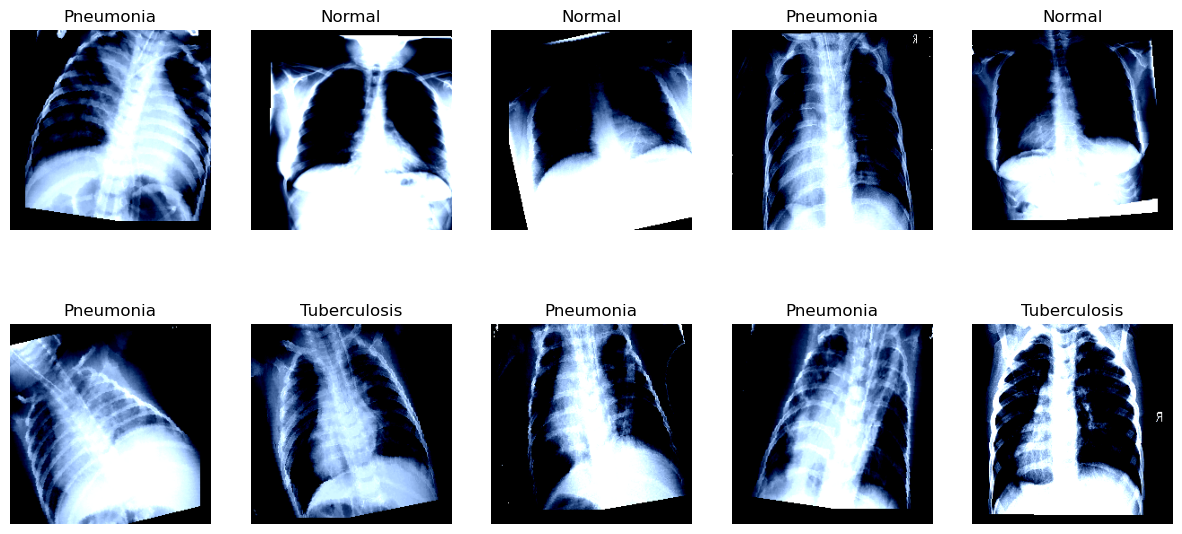

In [36]:
def visualize_training_data(loader):
    classes = loader.dataset.classes
    class_names = {i: classes[i] for i in range(len(classes))}
    images, labels = next(iter(loader))
    fig, axes = plt.subplots(figsize=(15, 7), ncols=5, nrows=2)
    for i, ax in enumerate(axes.flat):
        image = images[i].permute(1, 2, 0)
        ax.imshow(image)
        ax.set_title(class_names[labels[i].item()])
        ax.axis('off')
    plt.show()

visualize_training_data(train_loader)

# Define ResNet-18 model

In [37]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)  # 3 classes

c:\Users\faith\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\faith\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Define loss function and optimizer

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Target Accuracy

In [40]:
desired_val_accuracy = 0.99

# Training the model

In [41]:
num_epochs = 25
train_losses = []
val_losses = []
val_accuracies = []

In [42]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_data)
    train_losses.append(epoch_loss)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss /= len(test_data)
    accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)
    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_loss:.4f}, '
          f'Val Loss: {val_loss:.4f}, '
          f'Val Accuracy: {accuracy:.4f}')

Epoch [1/25], Train Loss: 0.3868, Val Loss: 0.8925, Val Accuracy: 0.8067
Epoch [2/25], Train Loss: 0.2829, Val Loss: 0.3453, Val Accuracy: 0.9267
Epoch [3/25], Train Loss: 0.2705, Val Loss: 0.3610, Val Accuracy: 0.9100
Epoch [4/25], Train Loss: 0.2438, Val Loss: 0.2657, Val Accuracy: 0.9033
Epoch [5/25], Train Loss: 0.2044, Val Loss: 0.3137, Val Accuracy: 0.9333
Epoch [6/25], Train Loss: 0.2278, Val Loss: 0.6119, Val Accuracy: 0.8500
Epoch [7/25], Train Loss: 0.2177, Val Loss: 0.2357, Val Accuracy: 0.9000
Epoch [8/25], Train Loss: 0.1987, Val Loss: 0.2064, Val Accuracy: 0.9300
Epoch [9/25], Train Loss: 0.1940, Val Loss: 0.1583, Val Accuracy: 0.9367
Epoch [10/25], Train Loss: 0.2523, Val Loss: 0.4213, Val Accuracy: 0.8300
Epoch [11/25], Train Loss: 0.1952, Val Loss: 0.2241, Val Accuracy: 0.8967
Epoch [12/25], Train Loss: 0.1962, Val Loss: 0.1262, Val Accuracy: 0.9333
Epoch [13/25], Train Loss: 0.1836, Val Loss: 0.1871, Val Accuracy: 0.9200
Epoch [14/25], Train Loss: 0.1551, Val Loss: 0.

# Plot training and validation loss

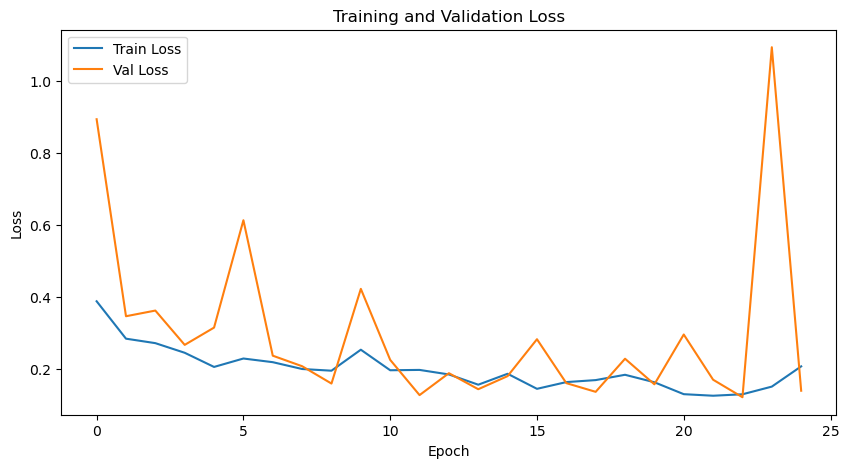

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot validation accuracy

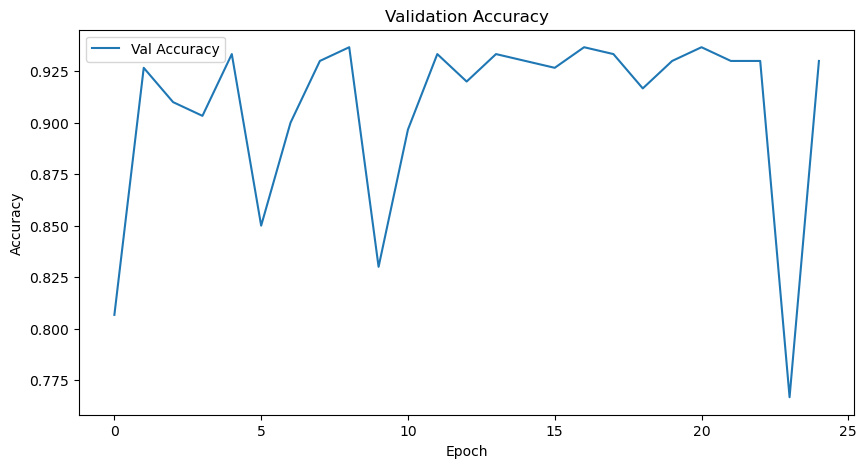

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

# Classification Report

In [45]:
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

class_names = test_data.classes
print(classification_report(true_labels, predictions, target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00       100
   Pneumonia       0.83      1.00      0.91       100
Tuberculosis       1.00      0.79      0.88       100

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



# Input function

In [46]:
# Function to predict image
def predict_image(image_path, model):
    image = Image.open(image_path)
    image = test_transform(image).unsqueeze(0)
    image = image.to(device)
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        predicted_class = class_names[predicted.item()]
    return predicted_class

In [47]:
image_path = '/content/drive/My Drive/THESIS/Datasets/Mary/test_data/Normal/Normal-62.png'
predicted_class = predict_image(image_path, model)
print(f'Predicted class: {predicted_class}')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/THESIS/Datasets/Mary/test_data/Normal/Normal-62.png'

In [ ]:
image_path = '/content/drive/My Drive/THESIS/Datasets/Mary/test_data/Pneumonia/person1_bacteria_1.jpeg'
predicted_class = predict_image(image_path, model)
print(f'Predicted class: {predicted_class}')

Predicted class: Pneumonia


In [ ]:
image_path = '/content/drive/My Drive/THESIS/Datasets/Mary/test_data/Tuberculosis/Tuberculosis-391.png'
predicted_class = predict_image(image_path, model)
print(f'Predicted class: {predicted_class}')

Predicted class: Tuberculosis
